# 1. Importing Modules

In [16]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")

# 2. Loading The Dataset

In [8]:
cursor = sqlite3.connect(r'../database/laptrack.db')

laptop_df = pd.read_sql_query("SELECT * FROM Laptop_Phase_2_2", cursor)

cursor.close()

laptop_df.head()

,Brand,Laptop_Model_Name,Laptop_Model_Number,Processor_Brand,Processor_Model,Storage_Type,Operating_System,Display_Resolution,Extracted_Rating,Battery_Life(Hours_Upto),...,Stock,Time_Of_Extraction,URL,Source,Storage_Capacity(GB),Display_Size(Inches),RAM(GB),No_Of_Reviews,Laptop_Dimensions,Laptop_Weight(Pounds)
0,Dell,Latitude 3540 Laptop,None,Intel,1355U,SSD,Windows 11 Professional,1920x1080 MP,NaN,NaN,...,1,2024-11-04 18:23:39,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,Amazon,4000,15.6,64,0,0.71 x 14.13 x 9.44 inches,4.00
1,HP,17t-cn3004,17t-cn3004208,Intel,Intel Core i5,SSD,Windows 11 Pro,1600x900 Pixels,5.0,NaN,...,1,2024-11-04 18:23:42,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,Amazon,4096,17.3,64,0,0.81 x 10.15 x 15.78 inches,5.00
2,Dell,"Dell Inspiron 15.6"" Touchscreen Laptop",None,Intel,1355U,SSD,Windows 11 Pro,1920x1080 Pixels,NaN,NaN,...,1,2024-11-04 18:23:45,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,Amazon,4096,15.6,32,0,9.25 x 0.75 x 14.11 inches,3.60
3,Apple,MacBook Pro,Mvvm2ll/a,Intel,Core i9,SSD,Mac OS X 10.0 Cheetah,2560 x 1600 Pixels,4.0,11.0,...,1,2024-11-04 18:23:54,https://www.amazon.com/2019-Apple-MacBook-16-i...,Amazon,2048,16.0,16,0,15.63 x 2.40 x 11.14 inches,5.68
4,HP,TPN-Q279,TPN-Q279,AMD,Ryzen 5,SSD,Windows 11 Home,1920 x 1080 Pixels,3.8,NaN,...,1,2024-11-04 18:23:57,https://www.amazon.com/HP-i7-1355U-i5-14400F-G...,Amazon,2048,15.6,16,0,0.93 x 10.04 x 14.09 inches,7.39


In [25]:
laptop_df  = pd.read_csv('LaptrackPhase2.csv')

# 3. Preparing the dataset for Model Building

In [26]:
# Define columns for each type
categorical_cols = ['Brand', 'Processor_Brand', 'Operating_System', 'Storage_Type', 'Processor_Model']
numerical_cols = ['Extracted_Rating', 'Storage_Capacity(GB)', 'Display_Size(Inches)', 'RAM(GB)', 'No_Of_Reviews', 'Laptop_Weight(Pounds)', 'Price']

decidingColumns = categorical_cols + numerical_cols
decidingColumns.append('Stock')

In [27]:
numerical_imputer = SimpleImputer(strategy='mean')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', numerical_imputer), 
            ('scaler', StandardScaler()) 
        ]), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [28]:
from sklearn.linear_model import LinearRegression


categorical_cols = ['Brand', 'Processor_Brand', 'Operating_System', 'Storage_Type', 'Processor_Model']
numerical_cols = ['Extracted_Rating', 'Storage_Capacity(GB)', 'Display_Size(Inches)', 'RAM(GB)', 'No_Of_Reviews', 'Laptop_Weight(Pounds)', 'Price']

laptop_df = laptop_df.dropna(subset=['Price'])

X = laptop_df[categorical_cols + numerical_cols[:-1]]  # Exclude Price from features
y = laptop_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_cols[:-1]),  # Exclude 'Price'
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

full_pipeline.fit(X_train, y_train)

y_pred = full_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Predicted values:", y_pred)
print("Actual values:", y_test.values)
print("Root Mean Squared Error:", rmse)

Predicted values: [ 2.35949834e+02  4.55544431e+02  4.07242992e+02  1.16966810e+03
  3.85039247e+02  2.93670673e+02  7.06450725e+02  1.64661643e+03
  4.89985942e+02  1.12796314e+03  1.24443364e+03  2.63221200e+03
  9.86711563e+02  6.95646540e+02  8.35324248e+02  1.50448208e+03
  8.12321381e+02  3.80303685e+02  1.48089880e+03  3.07471641e+02
  1.22952061e+03  6.67701755e+02  1.04083406e+03  6.28679075e+02
  1.17239330e+03  3.77361355e+02  3.01272816e+02  2.33481269e+03
  7.71269650e+02  9.47949572e+02  7.00338766e+02  6.28679075e+02
  1.23020386e+03  3.28836790e+02  2.69274972e+02  1.22965640e+03
  8.67258971e+02  2.50646150e+03  6.09552076e+02  1.86922160e+03
  6.08620068e+02  2.16042480e+03  6.54989286e+02  4.45918238e+02
  1.73465221e+02  7.86000426e+02  9.62591143e+02  7.26886359e+02
  4.97743321e+02  9.91350840e+02  1.75406669e+03  1.00023503e+03
  1.36751876e+03  4.07242992e+02  1.66256531e+03  6.84644889e+02
  1.42277409e+03  9.34308529e+02  8.47530300e+02  6.31346610e+02
  5.962

Predicted values: [ 2.35949834e+02  4.55544431e+02  4.07242992e+02  1.16966810e+03
  3.85039247e+02  2.93670673e+02  7.06450725e+02  1.64661643e+03
  4.89985942e+02  1.12796314e+03  1.24443364e+03  2.63221200e+03
  9.86711563e+02  6.95646540e+02  8.35324248e+02  1.50448208e+03
  8.12321381e+02  3.80303685e+02  1.48089880e+03  3.07471641e+02
  1.22952061e+03  6.67701755e+02  1.04083406e+03  6.28679075e+02
  1.17239330e+03  3.77361355e+02  3.01272816e+02  2.33481269e+03
  7.71269650e+02  9.47949572e+02  7.00338766e+02  6.28679075e+02
  1.23020386e+03  3.28836790e+02  2.69274972e+02  1.22965640e+03
  8.67258971e+02  2.50646150e+03  6.09552076e+02  1.86922160e+03
  6.08620068e+02  2.16042480e+03  6.54989286e+02  4.45918238e+02
  1.73465221e+02  7.86000426e+02  9.62591143e+02  7.26886359e+02
  4.97743321e+02  9.91350840e+02  1.75406669e+03  1.00023503e+03
  1.36751876e+03  4.07242992e+02  1.66256531e+03  6.84644889e+02
  1.42277409e+03  9.34308529e+02  8.47530300e+02  6.31346610e+02
  5.962

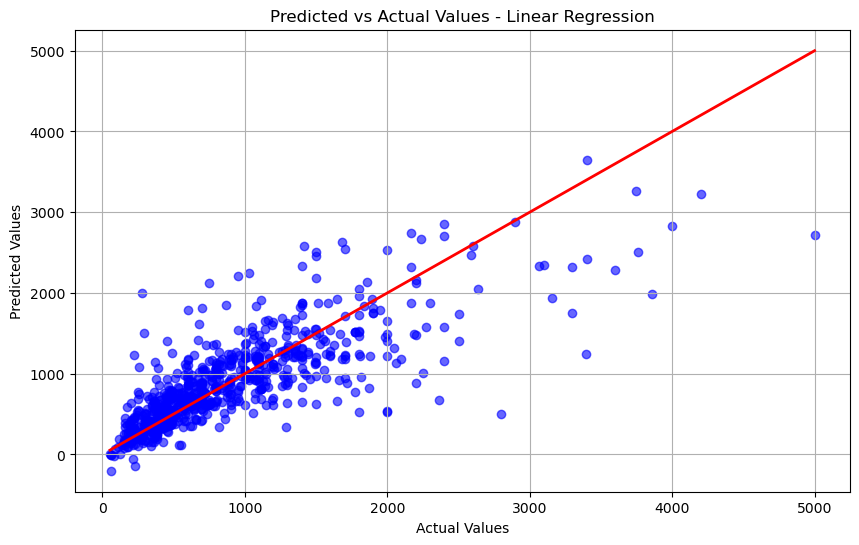

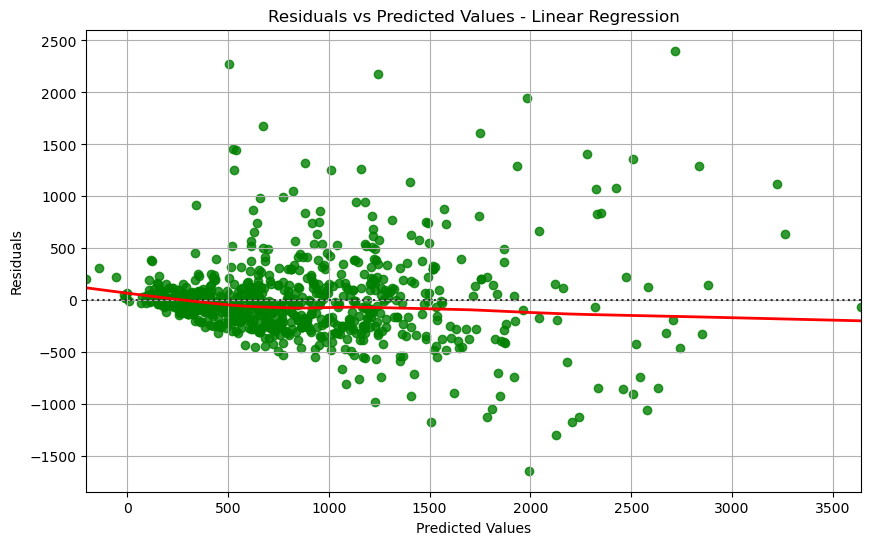

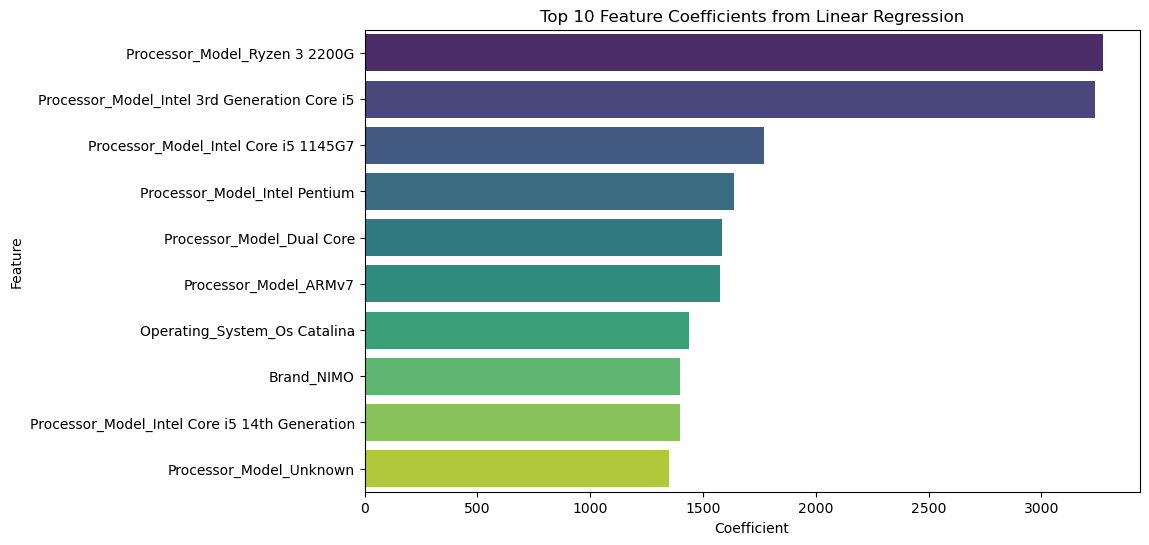

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Assuming you have already loaded and preprocessed the laptop_df dataset
# Define columns
categorical_cols = ['Brand', 'Processor_Brand', 'Operating_System', 'Storage_Type', 'Processor_Model']
numerical_cols = ['Extracted_Rating', 'Storage_Capacity(GB)', 'Display_Size(Inches)', 'RAM(GB)', 'No_Of_Reviews', 'Laptop_Weight(Pounds)', 'Price']

# Clean the DataFrame by dropping rows where 'Price' is missing
laptop_df = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = laptop_df[categorical_cols + numerical_cols[:-1]]  # Exclude Price from features
y = laptop_df['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor with numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_cols[:-1]),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Create the Linear Regression pipeline
linear_regressor = LinearRegression()

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', linear_regressor)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Output predictions and RMSE
print("Predicted values:", y_pred)
print("Actual values:", y_test.values)
print("Root Mean Squared Error:", rmse)

# Predicted vs Actual Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Identity line
plt.title("Predicted vs Actual Values - Linear Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# Residual Plot (Predicted values vs Residuals)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="green", line_kws={'color': 'red', 'lw': 2})
plt.title("Residuals vs Predicted Values - Linear Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Feature Coefficients Plot (for Linear Regression)
coefficients = pipeline.named_steps['regressor'].coef_

# Get the feature names from one-hot encoding (including numerical features)
cat_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([cat_feature_names, numerical_cols[:-1]])

# Prepare a DataFrame for better visualization of feature importance
coef_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Number of top features to display
top_n = 10  # Adjust this value as needed to display the top N features

# Sort the coefficients by absolute value and get the top N features
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
top_coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False).head(top_n)

# Plot top feature coefficients (importance)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_coef_df, palette='viridis')
plt.title(f"Top {top_n} Feature Coefficients from Linear Regression")
plt.show()


# 4. Model Building

In [ ]:
# Lists to store prediction of each model and the trained model object
y_pred_reg_models = []
reg_model = []

## 4.1 KNN Regressor

Predicted values: [ 298.82   446.064  407.15   907.792  432.686  596.986  610.6   1387.71
  428.354 1099.99  1148.196 1493.396  833.99   643.39  1034.776  503.576
  976.68   444.19  3096.586  400.75   629.99   405.718  587.084  663.202
  865.748  427.4    337.988 2399.99   865.792  941.99   526.962  663.202
 1087.896  322.178  416.884 1262.794  905.    2578.19   494.28  1753.
  633.232 1409.99   569.396  447.48   454.094  648.104 1605.592  525.396
  249.49  1030.452 1959.99  1013.572  947.99   407.15  1370.152  599.826
  918.486  895.628  737.1    648.104  866.902  787.392 1087.896  439.894
  815.89  1839.99  2802.348 1033.368  908.438 1809.99   350.692  529.998
 1078.192 1587.392  721.594  401.58   206.792  557.582  655.08   499.758
  443.88   657.192  455.88   493.236 1289.482  976.68   495.926  772.996
  568.194  639.99   400.75   420.104  508.406  592.828 1117.198  430.188
 1201.992  685.79   697.816  724.68   935.664 1097.99   605.79   838.406
 1185.326 1105.99  2104.09  1959.99  

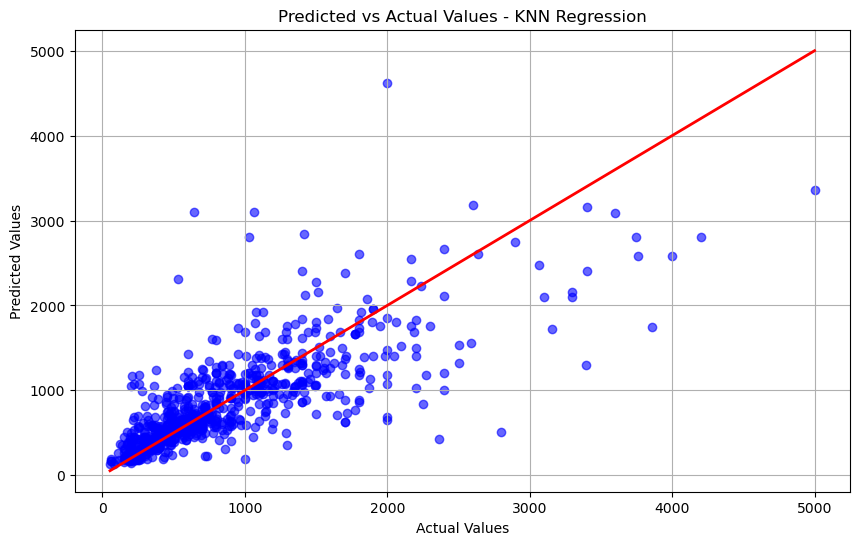

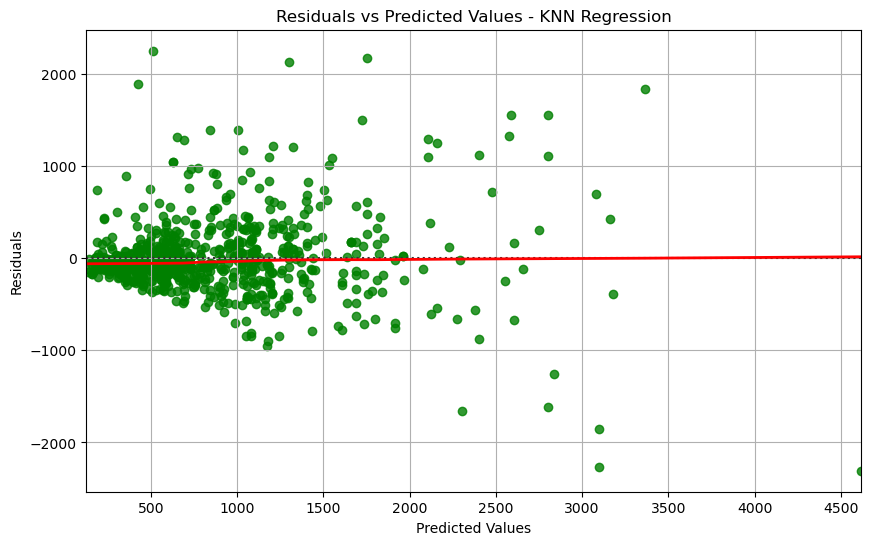

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

# Define columns
KNNcategorical_cols = ['Brand', 'Processor_Brand', 'Storage_Type', 'Processor_Model']
KNNnumerical_cols = ['Storage_Capacity(GB)', 'RAM(GB)', 'Price']

# Clean the DataFrame by dropping rows where 'Price' is missing
KNN_df_cleaned = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = KNN_df_cleaned[KNNcategorical_cols + KNNnumerical_cols[:-1]]  # Exclude Price from features
y = KNN_df_cleaned['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor with numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), KNNnumerical_cols[:-1]),
        ('cat', OneHotEncoder(handle_unknown='ignore'), KNNcategorical_cols)
    ]
)

# Create the KNN Regression pipeline
knn_regressor = KNeighborsRegressor(n_neighbors=5)

KNN_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', knn_regressor)
])

# Fit the pipeline on the training data
KNN_pipeline.fit(X_train, y_train)

# Predict on the test set
KNN_y_pred = KNN_pipeline.predict(X_test)

# Calculate RMSE
KNN_mse = mean_squared_error(y_test, KNN_y_pred)
KNN_rmse = np.sqrt(KNN_mse)

# Output predictions and RMSE
print("Predicted values:", KNN_y_pred)
print("Actual values:", y_test.values)
print("Root Mean Squared Error:", KNN_rmse)

# Predicted vs Actual Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, KNN_y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Identity line
plt.title("Predicted vs Actual Values - KNN Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# Residual Plot (Predicted values vs Residuals)
residuals = y_test - KNN_y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=KNN_y_pred, y=residuals, lowess=True, color="green", line_kws={'color': 'red', 'lw': 2})
plt.title("Residuals vs Predicted Values - KNN Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


In [ ]:
# y_pred_reg_models.append(y_pred_knn_regressor)

In [ ]:
# reg_model.append(knn_regressor)

## 4.2 Decision Tree Regressor

In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_train_scaled, y_train)

y_pred_decision_tree = decision_tree_regressor.predict(X_test_scaled)

In [32]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Define categorical and numerical columns
DTcategorical_cols = ['Brand', 'Processor_Brand', 'Storage_Type', 'Processor_Model']
DTnumerical_cols = ['Storage_Capacity(GB)', 'RAM(GB)', 'Price']

# Clean the DataFrame by dropping rows where 'Price' is missing
DT_df_cleaned = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = DT_df_cleaned[DTcategorical_cols + DTnumerical_cols[:-1]]  # Exclude Price from features
y = DT_df_cleaned['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor with numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), DTnumerical_cols[:-1]), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), DTcategorical_cols)
    ]
)

# Create the Decision Tree pipeline
decision_tree_regressor = DecisionTreeRegressor(random_state=42)

DT_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', decision_tree_regressor)
])

# Fit the pipeline on the training data
DT_pipeline.fit(X_train, y_train)

# Predict on the test set
DT_y_pred = DT_pipeline.predict(X_test)

# Calculate RMSE
DT_mse = mean_squared_error(y_test, DT_y_pred)
DT_rmse = np.sqrt(DT_mse)

# Output predictions and RMSE
print("Predicted values:", DT_y_pred)
print("Actual values:", y_test.values)
print("Root Mean Squared Error:", DT_rmse)


Predicted values: [ 300.51666667  448.81186047  407.15        937.76727273  394.79
  629.99        628.25        599.99        293.59       1099.99
 1052.7         778.88       1199.99        628.07333333  647.495
  359.99       1004.02285714  360.99        599.95        415.25
 1399.99        405.95666667  753.17285714  690.59525     899.99
  320.          199.99       2383.32333333  949.99        999.99
  339.585       690.59525    1093.05111111  327.7275      443.88
 1262.794       899.         2895.49        605.8915625  1753.
  694.75653846  999.99        514.99        433.44        583.37714286
  724.74318182 1020.20235294  594.          219.99       1030.452
 1883.32333333 1026.12333333  956.65666667  407.15       1327.94
  488.          815.8575      462.          739.985       724.74318182
  462.          699.         1093.05111111  457.50583333  571.99
 1128.99       2749.         1124.32333333  409.         1049.99
  233.615       183.          579.99       1499.99        46

In [ ]:
y_pred_reg_models.append(y_pred_decision_tree)

In [ ]:
reg_model.append(decision_tree_regressor)

## 4.3 Linear Regression

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()


# Full pipeline with preprocessing and model
LR_full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', linear_regressor)
])

# Fit the model
LR_full_pipeline.fit(X_train, y_train)

# Make predictions on the test set
LR_y_pred = full_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Predicted values:", y_pred)
print("Actual values:", y_test.values)
print("Root Mean Squared Error:", rmse)

linear_regressor.fit(X_train_scaled, y_train)

y_pred_linear = linear_regressor.predict(X_test_scaled)

In [ ]:
y_pred_reg_models.append(y_pred_linear)

In [ ]:
reg_model.append(linear_regressor)

## 4.4 Ridge Regression

In [ ]:
# Ridge Regression
from sklearn.linear_model import Ridge

ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_regressor.predict(X_test_scaled)

In [33]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Define categorical and numerical columns
Ridgecategorical_cols = ['Brand', 'Processor_Brand', 'Storage_Type', 'Processor_Model']
Ridgenumerical_cols = ['Storage_Capacity(GB)', 'RAM(GB)', 'Price']

# Clean the DataFrame by dropping rows where 'Price' is missing
Ridge_df_cleaned = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = Ridge_df_cleaned[Ridgecategorical_cols + Ridgenumerical_cols[:-1]]  # Exclude Price from features
y = Ridge_df_cleaned['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor with numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), Ridgenumerical_cols[:-1]), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), Ridgecategorical_cols)
    ]
)

# Create the Ridge Regression pipeline
ridge_regressor = Ridge(alpha=1.0)

Ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ridge_regressor)
])

# Fit the pipeline on the training data
Ridge_pipeline.fit(X_train, y_train)

# Predict on the test set
Ridge_y_pred = Ridge_pipeline.predict(X_test)

# Calculate RMSE
Ridge_mse = mean_squared_error(y_test, Ridge_y_pred)
Ridge_rmse = np.sqrt(Ridge_mse)

# Output predictions and RMSE
print("Predicted values:", Ridge_y_pred)
print("Actual values:", y_test.values)
print("Root Mean Squared Error:", Ridge_rmse)


Predicted values: [ 251.18797532  418.07276336  477.21454718 1091.55380234  379.67297433
  493.61253926  700.06570644 1553.18885249  700.17549658 1179.00936868
 1194.36808264 2781.53377074  907.79269226  809.1682973   887.09052201
 1285.2190518   845.51077191  370.19633685 1715.22220072  306.25377528
 1166.69575455  568.96021948  846.44108407  622.54396289 1239.74722256
  324.3003491   165.95971946 2255.86427975  774.39393922  812.70067408
  510.09205808  622.54396289 1306.3992904   280.69673909  367.66245326
 1234.83771691  855.35682438 2347.53992889  570.67397957 1825.40545519
  548.49184711 2280.48825889  623.71445931  444.15609581  356.28258204
  621.91104616  773.02188503  722.58407406  318.35665317 1076.83981829
 1686.4875903   988.98136509 1369.0373441   477.21454718 1920.795915
  555.33713493 1268.93217645  728.75626199  769.05750254  621.91104616
  679.21015541 1075.8074839  1306.3992904   344.65356432 1699.82920529
 1661.03717459 2144.35956316 1251.3139586   634.94411599 2418

In [ ]:
y_pred_reg_models.append(y_pred_ridge)

In [ ]:
reg_model.append(ridge_regressor)

## 4.5 Lasso Regression

In [ ]:
# Lasso Regression
from sklearn.linear_model import Lasso

lasso_regressor = Lasso(alpha=0.1)
lasso_regressor.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_regressor.predict(X_test_scaled)

In [34]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Define categorical and numerical columns
Lassocategorical_cols = ['Brand', 'Processor_Brand', 'Storage_Type', 'Processor_Model']
Lassonumerical_cols = ['Storage_Capacity(GB)', 'RAM(GB)', 'Price']

# Clean the DataFrame by dropping rows where 'Price' is missing
Lasso_df_cleaned = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = Lasso_df_cleaned[Lassocategorical_cols + Lassonumerical_cols[:-1]]  # Exclude Price from features
y = Lasso_df_cleaned['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor with numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), Lassonumerical_cols[:-1]), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), Lassocategorical_cols)
    ]
)

# Create the Lasso Regression pipeline
lasso_regressor = Lasso(alpha=0.1)

Lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lasso_regressor)
])

# Fit the pipeline on the training data
Lasso_pipeline.fit(X_train, y_train)

# Predict on the test set
Lasso_y_pred = Lasso_pipeline.predict(X_test)

# Calculate RMSE
Lasso_mse = mean_squared_error(y_test, Lasso_y_pred)
Lasso_rmse = np.sqrt(Lasso_mse)

# Output predictions and RMSE
print("Predicted values:", Lasso_y_pred)
print("Actual values:", y_test.values)
print("Root Mean Squared Error:", Lasso_rmse)


Predicted values: [ 249.29573528  417.34176619  455.09325078 1096.82545929  381.08124646
  473.2062446   692.54912701 1581.4828553   715.93957762 1163.67257545
 1195.87617216 2744.17735799  886.90296781  802.22153983  745.16014259
 1273.94441497  843.41150437  302.53825921 1528.55612201  317.30901816
 1268.75994079  553.11029703  851.90916484  617.59667385 1224.23530845
  336.17780482  221.88635648 2301.75681144  775.43586445  775.23580352
  520.29590752  617.59667385 1296.3017226   288.42035814  316.16076249
 1222.42505669  859.60598296 2492.32157058  567.88799004 1815.99844559
  556.55642726 2357.95258048  617.67021628  439.5694214   366.3703043
  620.32865555  788.13693654  706.40208149  306.23858654 1069.47228323
 1720.6137216   994.40814708 1377.90648292  455.09325078 1876.47003831
  538.71799697 1244.2260916   541.44997867  771.64802489  620.32865555
  541.44997867 1064.09005402 1296.3017226   353.5695379  1724.37765297
 1695.65408469 2140.89342965 1273.49167028  641.78558232 247

In [ ]:
y_pred_reg_models.append(y_pred_lasso)

In [ ]:
reg_model.append(lasso_regressor)

## 4.6 RANSAC Regression

In [ ]:
# RANSAC Regression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression

ransac_regressor = RANSACRegressor(estimator=LinearRegression(), random_state=42)
ransac_regressor.fit(X_train_scaled, y_train)

y_pred_ransac = ransac_regressor.predict(X_test_scaled)

In [35]:
# RANSAC Regression
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Define categorical and numerical columns
RANSACcategorical_cols = ['Brand', 'Processor_Brand', 'Storage_Type', 'Processor_Model']
RANSACnumerical_cols = ['Storage_Capacity(GB)', 'RAM(GB)', 'Price']

# Clean the DataFrame by dropping rows where 'Price' is missing
RANSAC_df_cleaned = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = RANSAC_df_cleaned[RANSACcategorical_cols + RANSACnumerical_cols[:-1]]  # Exclude Price from features
y = RANSAC_df_cleaned['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor with numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), RANSACnumerical_cols[:-1]), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), RANSACcategorical_cols)
    ]
)

# Create the RANSAC Regression pipeline
ransac_regressor = RANSACRegressor(estimator=LinearRegression(), random_state=42)

RANSAC_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ransac_regressor)
])

# Fit the pipeline on the training data
RANSAC_pipeline.fit(X_train, y_train)

# Predict on the test set
RANSAC_y_pred = RANSAC_pipeline.predict(X_test)

# Calculate RMSE
RANSAC_mse = mean_squared_error(y_test, RANSAC_y_pred)
RANSAC_rmse = np.sqrt(RANSAC_mse)

# Output predictions and RMSE
print("Predicted values:", RANSAC_y_pred)
print("Actual values:", y_test.values)
print("Root Mean Squared Error:", RANSAC_rmse)


Predicted values: [  256.03297634   433.23163805   407.13480997  1029.61419899
   413.30685909   387.18186915   686.75624217  1496.31422287
   680.38757417   987.08894015   260.60133848  2244.38587197
   864.08070609   629.76512843   964.76791081  1276.99724932
   712.80153865   360.79878881  2315.57775455   364.86454971
  1001.81681831   445.5630664    809.24366115   674.47678314
  1292.05021641   283.683416     200.0053819   1600.09768017
   961.86015702   898.76807229   603.29720771   674.47678314
  1311.03362699   322.51151791   439.74319373  1183.19918061
   787.9608536    721.17240664   587.01079682  2117.80013149
   623.22198667  1719.04595071   536.42796194   486.15355189
   476.1814784    671.66429605   760.80135177   634.97969806
   264.32824846   928.79233493  1623.90757828   944.00392233
  1081.44726462   407.13480997  1629.83009039   592.12388891
   814.76904559   596.66310019   834.84753084   671.66429605
   793.44269293  1104.72448484  1311.03362699   384.78932867
  1587

In [ ]:
y_pred_reg_models.append(y_pred_ransac)

In [ ]:
reg_model.append(ransac_regressor)

## 4.7 Theil-Sen Regression

In [ ]:
# Theil-Sen Regression
from sklearn.linear_model import TheilSenRegressor

theil_sen_regressor = TheilSenRegressor(random_state=42)
theil_sen_regressor.fit(X_train_scaled, y_train)

y_pred_theil_sen = theil_sen_regressor.predict(X_test_scaled)

In [ ]:
y_pred_reg_models.append(y_pred_theil_sen)

In [ ]:
reg_model.append(theil_sen_regressor)

## 4.8 SVM Regression

In [ ]:
# SVM Regression
from sklearn.svm import SVR

svm_regressor = SVR(kernel='rbf')
svm_regressor.fit(X_train_scaled, y_train)

y_pred_svm = svm_regressor.predict(X_test_scaled)

In [38]:
# SVM Regression
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Define categorical and numerical columns
SVMcategorical_cols = ['Brand', 'Processor_Brand', 'Storage_Type', 'Processor_Model']
SVMnumerical_cols = ['Storage_Capacity(GB)', 'RAM(GB)', 'Price']

# Clean the DataFrame by dropping rows where 'Price' is missing
SVM_df_cleaned = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = SVM_df_cleaned[SVMcategorical_cols + SVMnumerical_cols[:-1]]  # Exclude Price from features
y = SVM_df_cleaned['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor with numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), SVMnumerical_cols[:-1]), 
        ('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), SVMcategorical_cols)  # Set sparse=False
    ]
)

# Create the SVM Regression pipeline
svm_regressor = SVR(kernel='rbf')

SVM_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', svm_regressor)
])

# Fit the pipeline on the training data
SVM_pipeline.fit(X_train, y_train)

# Predict on the test set
SVM_y_pred = SVM_pipeline.predict(X_test)

# Calculate RMSE
SVM_mse = mean_squared_error(y_test, SVM_y_pred)
SVM_rmse = np.sqrt(SVM_mse)

# Output predictions and RMSE
print("Predicted values:", SVM_y_pred)
print("Actual values:", y_test.values)
print("Root Mean Squared Error:", SVM_rmse)


Predicted values: [547.17500207 532.03511379 694.45076167 645.61266831 522.3659833
 621.7386502  755.69843055 625.83089443 596.13742537 808.86828345
 698.57279533 725.58459285 618.44743397 639.55134064 736.13923101
 576.36613273 629.79566557 564.94456028 704.04761213 498.04351503
 626.22016716 681.72782922 615.06692487 614.71307689 625.10750763
 567.24396706 557.38931707 714.23601242 770.39411079 630.19916228
 580.36252246 614.71307689 829.92218787 553.38044554 498.53648522
 650.8929467  684.38983287 749.24340673 613.39341615 717.26331693
 591.60170235 640.76277015 669.50806911 556.2637119  650.50109388
 614.59322821 590.46829835 718.19810379 553.59990697 717.84837582
 706.16850038 716.87071023 620.79333791 694.45076167 728.66723451
 594.81321871 639.3696419  579.56464485 630.78817841 614.59322821
 598.92870953 763.30393529 829.92218787 507.57409475 710.32457724
 681.55655775 809.97602949 628.49974641 672.92914137 630.062289
 577.62709621 691.11771844 582.14498133 662.12751399 745.7707

In [ ]:
y_pred_reg_models.append(y_pred_svm)

In [ ]:
reg_model.append(svm_regressor)

## 4.9 Random Forest Regression

In [39]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor(random_state=42)
random_forest_regressor.fit(X_train_scaled, y_train)

y_pred_random_forest = random_forest_regressor.predict(X_test_scaled)

NameError: name 'X_train_scaled' is not defined

In [40]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Define categorical and numerical columns
RandomForestcategorical_cols = ['Brand', 'Processor_Brand', 'Storage_Type', 'Processor_Model']
RandomForestnumerical_cols = ['Storage_Capacity(GB)', 'RAM(GB)', 'Price']

# Clean the DataFrame by dropping rows where 'Price' is missing
RandomForest_df_cleaned = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = RandomForest_df_cleaned[RandomForestcategorical_cols + RandomForestnumerical_cols[:-1]]  # Exclude Price from features
y = RandomForest_df_cleaned['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor with numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), RandomForestnumerical_cols[:-1]), 
        ('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), RandomForestcategorical_cols)  # Set sparse=False
    ]
)

# Create the Random Forest Regression pipeline
random_forest_regressor = RandomForestRegressor(random_state=42)

RandomForest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', random_forest_regressor)
])

# Fit the pipeline on the training data
RandomForest_pipeline.fit(X_train, y_train)

# Predict on the test set
RandomForest_y_pred = RandomForest_pipeline.predict(X_test)

# Calculate RMSE
RandomForest_mse = mean_squared_error(y_test, RandomForest_y_pred)
RandomForest_rmse = np.sqrt(RandomForest_mse)

# Output predictions and RMSE
print("Predicted values:", RandomForest_y_pred)
print("Actual values:", y_test.values)
print("Root Mean Squared Error:", RandomForest_rmse)


Predicted values: [ 298.80508905  449.30593515  407.15        936.22858441  400.77192333
  499.24132401  654.95471104  618.44018718  293.96293405 1099.99
  913.0054254  2092.57804142 1208.2941      626.98666162  622.98080092
  427.2894     1003.77498263  459.39251667 1760.9552      413.74928667
 1310.98508095  406.0377281   748.16089998  689.63595776  925.79666667
  314.26803667  226.98796667 2390.12810762  912.09809216  912.61758526
  334.02367671  689.63595776 1092.52553266  330.83713646  361.07633333
 1265.3377866   876.1798     2477.51454286  603.77806553 1739.14243146
  700.17340713 1383.74982857  511.70581071  434.29733874  619.37905719
  722.29194535 1027.17384319  583.10713254  272.85111833 1046.5173819
 1866.0931746  1118.64486866  958.74444444  407.15       1328.65634365
  506.06579481  814.0829319   498.44473635  735.44368647  722.29194535
  541.60623079  799.80203333 1092.52553266  458.08305254  912.46499167
 1744.04472222 1718.59139976 1136.62116667  812.88887333 1269.59
 

In [ ]:
y_pred_reg_models.append(y_pred_random_forest)

In [ ]:
reg_model.append(random_forest_regressor)

## 4.10 GBDT Regression

In [ ]:
# GBDT Regression
from sklearn.ensemble import GradientBoostingRegressor

gbdt_regressor = GradientBoostingRegressor(random_state=42)
gbdt_regressor.fit(X_train_scaled, y_train)

y_pred_gbdt = gbdt_regressor.predict(X_test_scaled)

In [42]:
# GBDT Regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Define categorical and numerical columns
GBDTcategorical_cols = ['Brand', 'Processor_Brand', 'Storage_Type', 'Processor_Model']
GBDTnumerical_cols = ['Storage_Capacity(GB)', 'RAM(GB)', 'Price']

# Clean the DataFrame by dropping rows where 'Price' is missing
GBDT_df_cleaned = laptop_df.dropna(subset=['Price'])

# Define features (X) and target (y)
X = GBDT_df_cleaned[GBDTcategorical_cols + GBDTnumerical_cols[:-1]]  # Exclude Price from features
y = GBDT_df_cleaned['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor with numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), GBDTnumerical_cols[:-1]), 
        ('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), GBDTcategorical_cols)  # Set sparse=False
    ]
)

# Create the GBDT Regression pipeline
gbdt_regressor = GradientBoostingRegressor(random_state=42)

GBDT_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', gbdt_regressor)
])

# Fit the pipeline on the training data
GBDT_pipeline.fit(X_train, y_train)

# Predict on the test set
GBDT_y_pred = GBDT_pipeline.predict(X_test)

# Calculate RMSE
GBDT_mse = mean_squared_error(y_test, GBDT_y_pred)
GBDT_rmse = np.sqrt(GBDT_mse)

# Output predictions and RMSE
print("Predicted values:", GBDT_y_pred)
print("Actual values:", y_test.values)
print("Root Mean Squared Error:", GBDT_rmse)


Predicted values: [ 512.7209327   462.75029983  826.77104974  873.48292751  384.36159802
  591.35097298  676.54637342 1178.90275911  584.94210708 1180.85949782
  826.77104974 2067.67808808  947.5643396   799.31002966  815.59159937
  510.33182043  773.40985092  510.33182043 1527.26633084  376.68176044
  822.35357287  668.56223788  761.13491049  533.88492635  866.00743679
  390.78283882  327.34460565 2101.66101841 1049.90666768  701.95408539
  556.28551671  533.88492635 1157.44303192  512.7209327   384.36159802
 1036.16639939  798.62479093 2205.31490947  696.30091955 1779.02418395
  668.15466074 1665.85295948  739.01097742  470.26918121  825.60476899
  696.30091955  761.80223407  883.82130871  398.4626764   891.60504068
 1603.35879174  891.60504068  947.5643396   826.77104974 1157.44303192
  517.85070181  873.48292751  696.30091955  696.30091955  696.30091955
  696.30091955 1141.40584084 1157.44303192  455.07046226  871.97976654
 1338.1866355  1737.74211765  898.60772692 1227.79006341 15

In [ ]:
y_pred_reg_models.append(y_pred_gbdt)

In [ ]:
reg_model.append(gbdt_regressor)

## 4.11 XGBoost Regression

In [149]:
# XGBoost Regression
from xgboost import XGBRegressor

xgb_regressor = XGBRegressor(random_state=42)


# Full pipeline with preprocessing and model
XGBoost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb_regressor)
])

# Fit the model
XGBoost_pipeline.fit(X_train, y_train)

# Make predictions on the test set
XGBoost_y_pred = XGBoost_pipeline.predict(X_test)

# Evaluate the model
XGBmse = mean_squared_error(y_test, XGBoost_y_pred)
XGBrmse = np.sqrt(XGBmse)

print("Predicted values:", XGBoost_y_pred)
print("Actual values:", y_test.values)
print("Root Mean Squared Error:", XGBrmse)

# xgb_regressor.fit(X_train_scaled, y_train)

# y_pred_xgb = xgb_regressor.predict(X_test_scaled)

Predicted values: [2881.8096    987.0355    654.5816   1063.9218    799.1556    623.4902
  544.87445   764.5704   1203.9313    443.52933   539.57324   517.59155
  302.4451    538.87305  1070.6139    535.15515   392.54172   289.57382
 1043.0571    878.81964   563.6099   1641.5386    726.9576    538.95374
  214.83537   417.97888   316.17523   773.5574    555.8579   2427.901
  395.18686   844.80524   303.89264  1142.4967   1804.6577    512.0645
  532.33014   556.12555   130.11682   331.94202   924.26385   912.33905
  950.4577    580.87384   950.7291    326.396     619.7407    533.15735
 1911.1915    476.87476   886.6382    659.78125   542.1625    772.55304
  353.57382   595.7083   1907.0536    640.7923   3921.557    1565.5074
  296.07144  1024.124     762.53577   727.71936  1182.8412    163.15144
 1265.2291    770.2396   1153.4967   1150.9954    479.65305  1090.0403
  885.5009    421.00027  1739.7982   1173.4137    775.39667   187.15402
  906.18256   618.586    1436.8627    373.7668    85

In [ ]:
y_pred_reg_models.append(y_pred_xgb)

In [ ]:
reg_model.append(xgb_regressor)

# 5. Model Evaluation

In [ ]:
# First evaluating with MSE in order to identify the best models
from sklearn.metrics import mean_squared_error

mse_values = []


# for each model computing the MSE
for y_pred in y_pred_reg_models:
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

mse_df = pd.DataFrame({'Model': reg_model,'MSE': mse_values})

mse_df = mse_df.sort_values(by='MSE')

mse_df

In [ ]:
import re

# Function to extract model name from the 'Model' column
def extract_model_name(model):
    
    # Extracts the model name before the first '(' if present
    return re.split(r'\(', str(model))[0]

mse_df['Model Name'] = mse_df['Model'].apply(extract_model_name)

# Reorder the columns to have 'Model Name' as the first column
mse_df = mse_df[['Model Name', 'Model', 'MSE']]

mse_df

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='MSE', y='Model Name', data=mse_df, hue="Model Name", palette='viridis')
plt.title('Mean Squared Error for Regression Models')
plt.xlabel('Mean Squared Error')
plt.ylabel('Model')
plt.show()

In [ ]:
# Computing R2 Scores and Adjusted R2 Scores to check how good the model is in reality
from sklearn.metrics import r2_score

top_models_df = mse_df.head(3)

r2_scores = []
adj_r2_scores = []

n = len(y_test)  

for i, row in top_models_df.iterrows():

    model_name = row['Model']
    
    # Get the index of the model based on its name
    model_index = reg_model.index(model_name)  
    y_pred = y_pred_models[model_index]  # Retrieve the predictions for the model
    
    # Calculate R² Score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # Calculate Adjusted R² Score
    p = X.shape[1]  # number of features
    adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
    adj_r2_scores.append(adj_r2)


top_reg_model = pd.DataFrame({
    'Model_Name': top_models_df['Model'],
    'MSE_Value': top_models_df['MSE'],
    'R2_Score': r2_scores,
    'adjR2_Score': adj_r2_scores
})

top_reg_model

In [ ]:
top_3_models = [] # TODO: Add the top 3 Models

# Prepare figure
plt.figure(figsize=(12, 8))

# Plot KDE for each model
for i, model_name in enumerate(top_3_models):
    plt.subplot(3, 1, i + 1)
    
    # Get the actual and predicted values for each model
    y_pred = y_pred_reg_models[i]  # Adjust index based on how you store the predictions
    
    # KDE plot of actual vs predicted values
    sns.kdeplot(y_test, label='Actual', color='blue', fill=True)
    sns.kdeplot(y_pred, label=f'Predicted by {model_name}', color='orange', fill=True)
    
    # Plot settings
    plt.title(f'Actual vs Predicted Distribution: {model_name}', fontsize=14)
    plt.xlabel('Area Worst')
    plt.ylabel('Density')
    plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

# 6. Hyperparameter Tuning Top 3 Performing Models

In [ ]:
# TODO: Skeleton Code to be Added post Model Training

# 7. (Optional) Recommendation System